In [184]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as pl
import seaborn as sns
from datetime import datetime

df=pd.read_csv('C:/Users/Dell/Desktop/data/covid/covid_19_data.csv',parse_dates=['ObservationDate','Last Update'])
                  #parse_dates used to change date format we also used pd.to_datetime(column_name), but it takes 1 column omly 
print(df.shape)                      #parse_dates(column1,column2)    

(10046, 8)


In [185]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [186]:
print('Last Update:' +str(df.ObservationDate.max()))     #str(): convert values into string and + is used to add the both strings

Last Update:2020-03-29 00:00:00


In [187]:
# to check every place has only one observation on one date
c_data=df.groupby(['Country/Region','Province/State','ObservationDate']).count().iloc[:,0]
c_data[c_data>1]

Country/Region  Province/State  ObservationDate
Mainland China  Gansu           2020-03-11         2
                                2020-03-12         2
                Hebei           2020-03-11         2
                                2020-03-12         2
Name: SNo, dtype: int64

In [188]:
# clean data
df=df[df.Confirmed>0]
df=df.rename(columns={"ObservationDate":"Date",'Country/Region':'Country','Province/State':'State'})
df=df.drop(['SNo','Last Update'],axis=1)
df.isnull().sum()

Date            0
State        4560
Country         0
Confirmed       0
Deaths          0
Recovered       0
dtype: int64

In [189]:
data=df

In [190]:
# Sort data
data=data.sort_values(['Date','Country','State'])
data.head()
# Add column of days since first case
#data['first_date'] = data.groupby('Country')['Date'].transform('min')
#data['days'] = (data['Date'] - data['first_date']).dt.days

,Date,State,Country,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,2.0,0.0,0.0
20,2020-01-22,Macau,Macau,1.0,0.0,0.0
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0


In [191]:
data['first_date'] = data.groupby('Country')['Date'].transform('min')
data['days'] = (data['Date'] - data['first_date']).dt.days
data.head()
#data.shape

,Date,State,Country,Confirmed,Deaths,Recovered,first_date,days
35,2020-01-22,NaN,Japan,2.0,0.0,0.0,2020-01-22,0
20,2020-01-22,Macau,Macau,1.0,0.0,0.0,2020-01-22,0
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22,0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22,0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22,0


In [192]:

def get_place(row):
    if row['State'] == 'Hubei':
        return 'Hubei PRC'
    elif row['Country'] == 'Mainland China': 
        return 'Others PRC'
    else: return 'World'
    
data['segment'] = data.apply(lambda row: get_place(row), axis=1)

In [193]:
data.head()

,Date,State,Country,Confirmed,Deaths,Recovered,first_date,days,segment
35,2020-01-22,NaN,Japan,2.0,0.0,0.0,2020-01-22,0,World
20,2020-01-22,Macau,Macau,1.0,0.0,0.0,2020-01-22,0,World
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22,0,Others PRC
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22,0,Others PRC
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22,0,Others PRC


In [194]:
latest = data[data.Date == data.Date.max()]
print ('Total confirmed cases: %d' %np.sum(latest['Confirmed']))
print ('Total death cases: %.d' %np.sum(latest['Deaths']))
print ('Total recovered cases: %.d' %np.sum(latest['Recovered']))
print ('Death rate %%: %.2f' % (np.sum(latest['Deaths'])/np.sum(latest['Confirmed'])*100))

Total confirmed cases: 720117
Total death cases: 33924
Total recovered cases: 145951
Death rate %: 4.71


In [195]:
latest.head()
#latest.shape

,Date,State,Country,Confirmed,Deaths,Recovered,first_date,days,segment
9735,2020-03-29,NaN,Afghanistan,120.0,4.0,2.0,2020-02-24,34,World
9736,2020-03-29,NaN,Albania,212.0,10.0,33.0,2020-03-09,20,World
9737,2020-03-29,NaN,Algeria,511.0,31.0,31.0,2020-02-25,33,World
9738,2020-03-29,NaN,Andorra,334.0,6.0,1.0,2020-03-02,27,World
9739,2020-03-29,NaN,Angola,7.0,2.0,0.0,2020-03-20,9,World


In [196]:
cty=latest.groupby('Country').sum()
cty['Death Rate']= (cty['Deaths']/cty['Confirmed'])*100
cty['Recovered Rate']= (cty['Recovered']/cty['Confirmed'])*100
cty['Active']=cty['Confirmed']-cty['Deaths']-cty['Recovered']
cty=cty.sort_values("Confirmed",ascending=False)
cty.head()     # seems that Recovered data of US is incorrect
#cty.shape

,Confirmed,Deaths,Recovered,days,Death Rate,Recovered Rate,Active
Country,,,,,,,
US,140886.0,2467.0,0.0,3685,1.751061,0.000000,138419.0
Italy,97689.0,10779.0,13030.0,58,11.033996,13.338247,73880.0
Mainland China,81444.0,3300.0,75460.0,2077,4.051864,92.652620,2684.0
Spain,80110.0,6803.0,14709.0,57,8.492073,18.361004,58598.0
Germany,62095.0,533.0,9211.0,61,0.858362,14.833723,52351.0


In [197]:
cty=cty.drop('days',axis=1)
cty.head()

,Confirmed,Deaths,Recovered,Death Rate,Recovered Rate,Active
Country,,,,,,
US,140886.0,2467.0,0.0,1.751061,0.000000,138419.0
Italy,97689.0,10779.0,13030.0,11.033996,13.338247,73880.0
Mainland China,81444.0,3300.0,75460.0,4.051864,92.652620,2684.0
Spain,80110.0,6803.0,14709.0,8.492073,18.361004,58598.0
Germany,62095.0,533.0,9211.0,0.858362,14.833723,52351.0


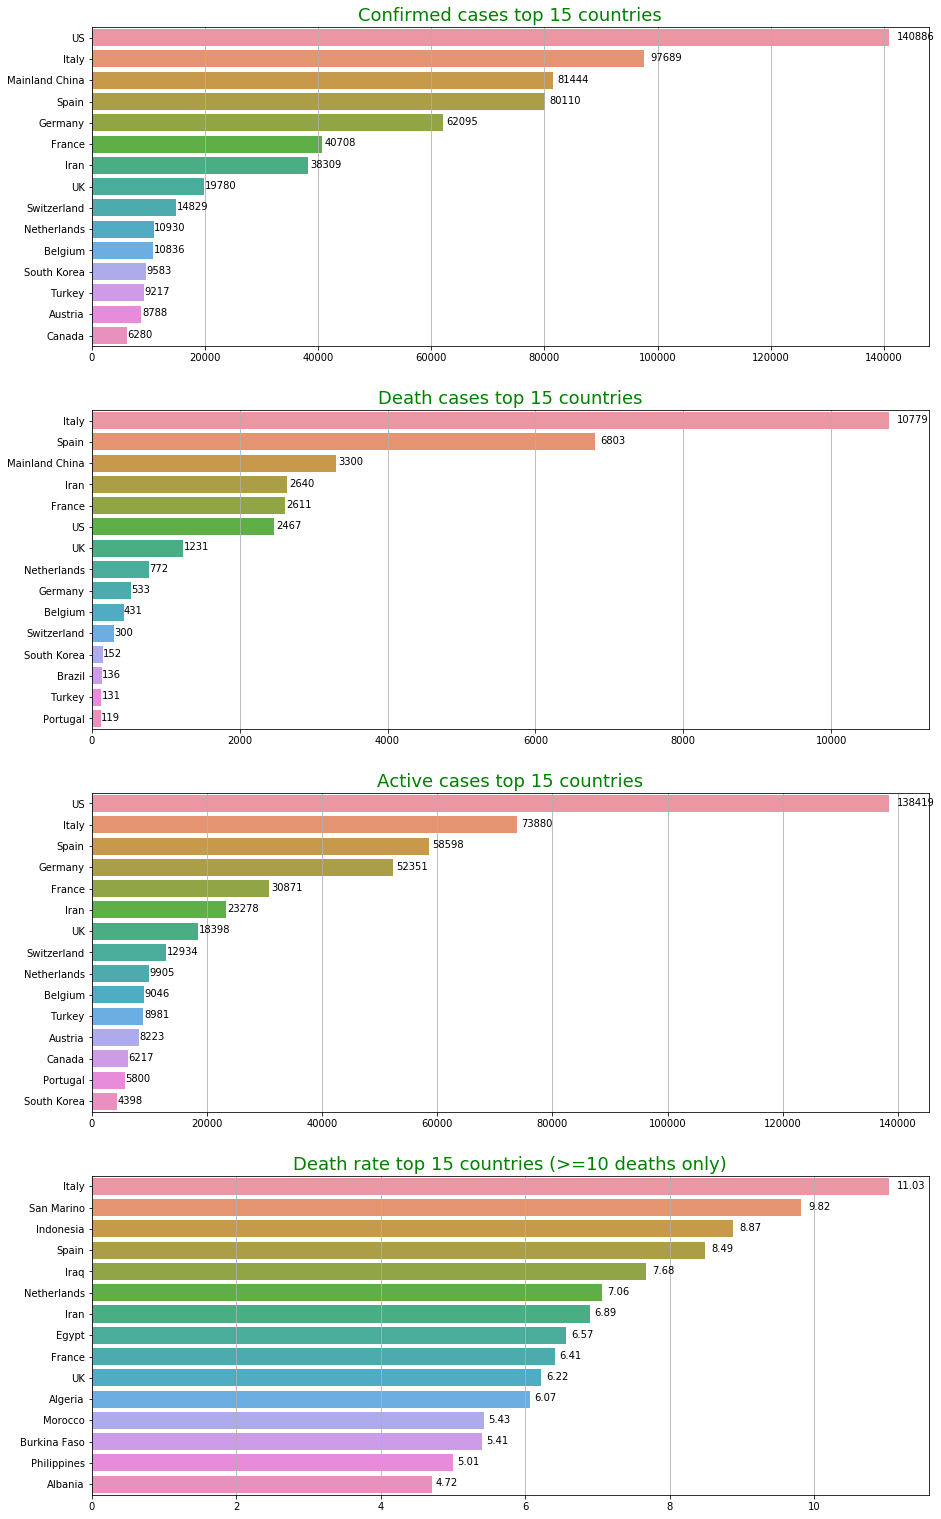

In [198]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
def plot_n(column,title):
    if column=="Death Rate":
        _=cty[cty['Deaths']>=10].sort_values('Death Rate',ascending=False).head(15)
    else:
        _=cty.sort_values(column,ascending=False).head(15)
    g=sns.barplot(_[column],_.index)
    plt.title(title,fontsize=18,c='green')
    plt.grid(axis='x')
    plt.xlabel(None)
    plt.ylabel(None)
    for i,v in enumerate(_[column]):                                  # enumerate give index to columns 
        if column== 'Death Rate':
            g.text(v*1.01,i+0.1,str(round(v,2)))                         # here v is horizontal and i is vertical cordinate
        else:                                                            # to write number 
            g.text(v*1.01,i+0.1,str(int(v)))
            
plt.figure(figsize=(15,27))
plt.subplot(411)
plot_n('Confirmed','Confirmed cases top 15 countries')
plt.subplot(412)
plot_n('Deaths','Death cases top 15 countries')
plt.subplot(413)
plot_n('Active','Active cases top 15 countries')
plt.subplot(414)
plot_n('Death Rate','Death rate top 15 countries (>=10 deaths only)')
plt.show()

### Findings :

1. Italy has almost twice the deaths of Mainland China
2. US quickly rose to 1st place in total confirmed cases (active case numbers are wrong due to error in recovered cases)

## Spreading of corona virus with time

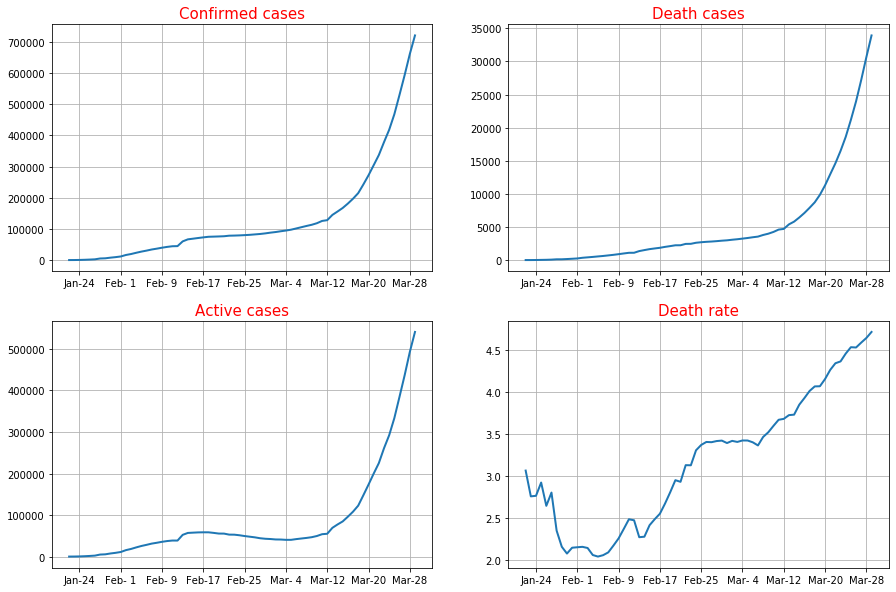

In [199]:
import matplotlib.dates as mdates
months_fmt = mdates.DateFormatter('%b-%e')

evo = data.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
evo['Active'] = evo['Confirmed'] - evo['Deaths'] - evo['Recovered']
evo['Death Rate'] = evo['Deaths'] / evo['Confirmed'] * 100
evo['Recover Rate'] = evo['Recovered'] / evo['Confirmed'] * 100
fig, ax = plt.subplots(2, 2, figsize=(15,10))

def plot_evo(num, col, title):
    ax[num].plot(evo[col], lw=2)
    ax[num].set_title(title,fontsize=15,c='red')
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(10))         # MaxNLocator() is used for ticks on x axis 
    ax[num].xaxis.set_major_formatter(months_fmt)
    #ax[num].set_xticklabels(ax[num].get_xticklabels(),rotation=75,horizontalalignment='right')
    ax[num].grid(True)
    
plot_evo((0,0), 'Confirmed', 'Confirmed cases')
plot_evo((0,1), 'Deaths', 'Death cases')
plot_evo((1,0), 'Active', 'Active cases')
plot_evo((1,1), 'Death Rate', 'Death rate')
plt.show()

### Note:
>There are two phases of outbreak. The first is in China, which makes the first peak in active cases in mid_Feb and decline; the second phase starts early March throughout the world, and the trend is still growing exponentially.

In [200]:
#evo_cty = data.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()

In [201]:
#evo_cty.head(10)

In [202]:
def plot_cty(num, evo_col, title):
    ax[num].plot(evo_col, lw=2)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(10))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)

def evo_cty(country):
    evo_cty = data[data.Country==country].groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
    evo_cty['Active'] = evo_cty['Confirmed'] - evo_cty['Deaths'] - evo_cty['Recovered']
    evo_cty['Death Rate'] = evo_cty['Deaths'] / evo_cty['Confirmed'] * 100
    plot_cty((0,0), evo_cty['Confirmed'], 'Confirmed cases')
    plot_cty((0,1), evo_cty['Deaths'], 'Death cases')
    plot_cty((1,0), evo_cty['Active'], 'Active cases')
    plot_cty((1,1), evo_cty['Death Rate'], 'Death rate')
    fig.suptitle(country, fontsize=16,c='green')                             # suptitle used to set title at center of fig.
    plt.show()

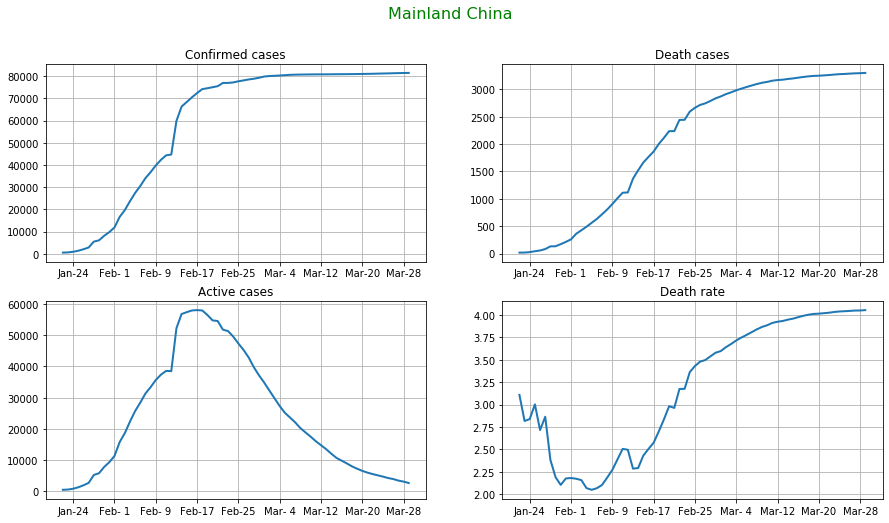

In [218]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
evo_cty('Mainland China')

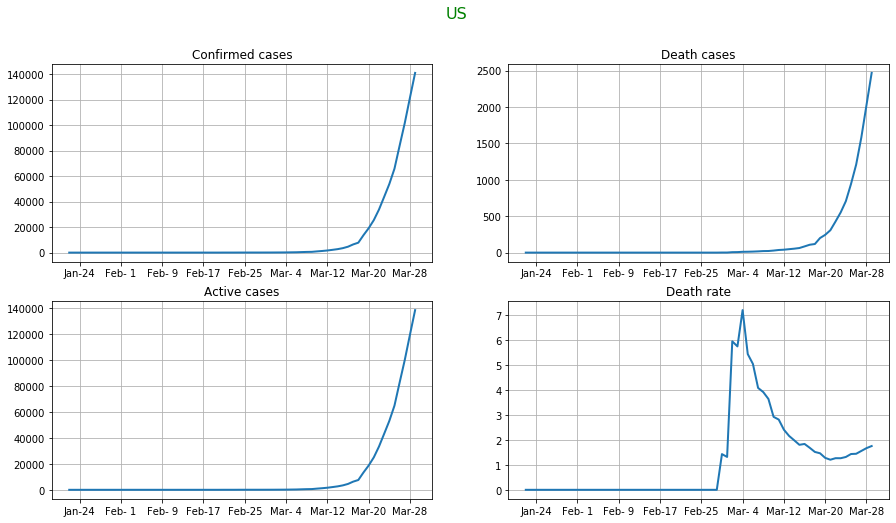

In [219]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
evo_cty('US')

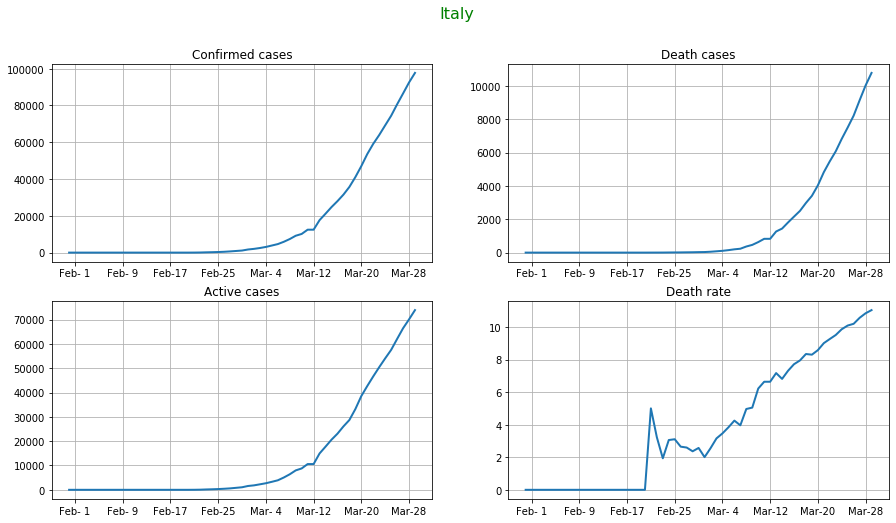

In [220]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
evo_cty('Italy')

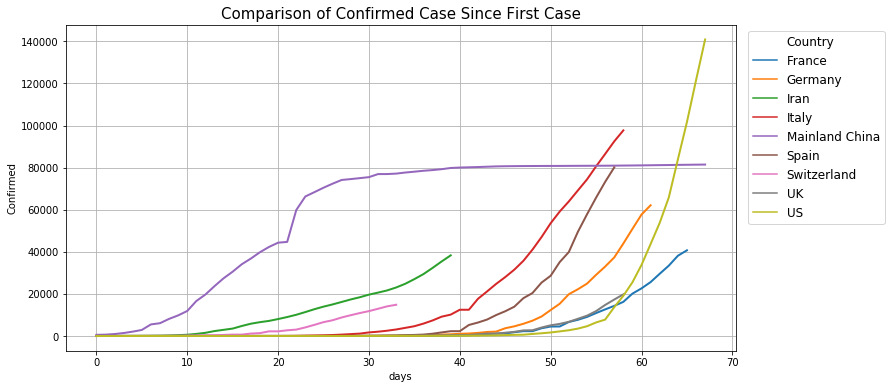

In [206]:
df_break = data.groupby(['Country','days'])['Confirmed','Deaths'].sum().reset_index()
top10case = latest.sort_values('Confirmed', ascending=False).head(10)['Country'].to_list()
top10death = latest.sort_values('Deaths', ascending=False).head(10)['Country'].to_list()
_ = df_break[df_break.Country.isin(top10case)]                             # isin( list or series) : to check 
plt.figure(figsize=(12,6))                                                  # lw : width of line
sns.lineplot(x='days',y='Confirmed', data=_, hue='Country', lw=2)         # hue: name of variables ( grouping variable which 
plt.legend(bbox_to_anchor=(1.01,1), fontsize=12)                               # produce ines with different color) 
plt.grid()
plt.title('Comparison of Confirmed Case Since First Case',fontsize=15)
plt.show()

In [207]:
df_break.head()

,Country,days,Confirmed,Deaths
0,Azerbaijan,0,1.0,0.0
1,"('St. Martin',)",0,2.0,0.0
2,Afghanistan,0,1.0,0.0
3,Afghanistan,1,1.0,0.0
4,Afghanistan,2,1.0,0.0


In [208]:
top10case

['Italy',
 'Spain',
 'Mainland China',
 'Germany',
 'US',
 'France',
 'Iran',
 'UK',
 'Switzerland',
 'US']

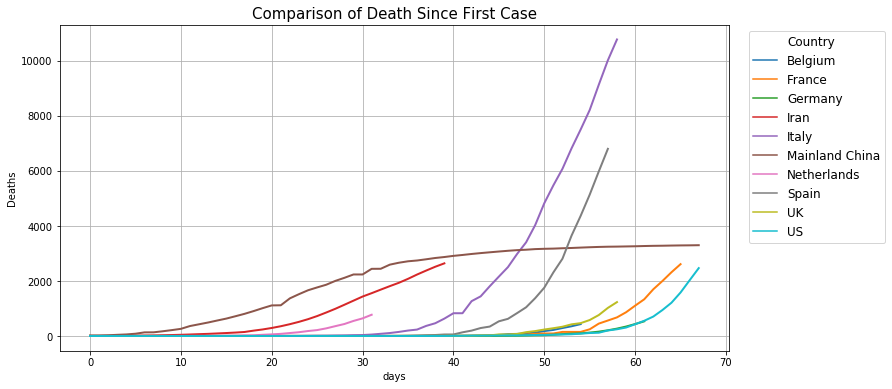

In [209]:
_ = df_break[df_break.Country.isin(top10death)]
plt.figure(figsize=(12,6))
sns.lineplot(x='days',y='Deaths', data=_, hue='Country', lw=2)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=12)
plt.grid(True)
plt.title('Comparison of Death Since First Case',fontsize=15)
plt.show()

In [210]:
top10death

['Italy',
 'Spain',
 'Mainland China',
 'Iran',
 'France',
 'UK',
 'US',
 'Netherlands',
 'Germany',
 'Belgium']

###  >Trajectory of first 10 countries with confirmed cases till now

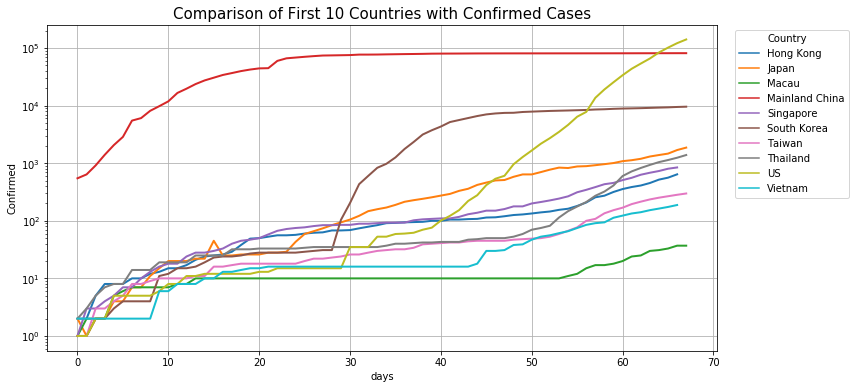

In [211]:
early_10=data.groupby('Country')['Date'].min().sort_values(ascending=True).head(10).index       # index :to make array  
#early_10.shape                                                               # date of first case in every country
#early_10                                                                 # total country or ( pd.unique(data['Country']) )

_ = df_break[df_break.Country.isin(early_10)]
plt.figure(figsize=(12,6))
sns.lineplot(x='days',y='Confirmed', data=_, hue='Country', lw=2)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=10)
plt.yscale('log')
plt.grid(True)
plt.title('Comparison of First 10 Countries with Confirmed Cases',fontsize=15)
plt.show()

In [212]:
early_ten=data.groupby('Country')['Date'].min().sort_values(ascending=True).head(10)
early_ten                                                                                  # first case on 22 January 2020

Country
Thailand         2020-01-22
Taiwan           2020-01-22
Macau            2020-01-22
Mainland China   2020-01-22
US               2020-01-22
South Korea      2020-01-22
Japan            2020-01-22
Vietnam          2020-01-23
Singapore        2020-01-23
Hong Kong        2020-01-23
Name: Date, dtype: datetime64[ns]